In [2]:
from keras.layers import Dense,Flatten

Using TensorFlow backend.


In [3]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [4]:
model =VGG16(input_shape=(224,224,3) ,weights='imagenet' ,include_top=False
    )

In [5]:
for layers in model.layers:
    layers.trainable=False

In [6]:
model.layers[4].trainable

False

In [7]:
top_model=Flatten()(model.output)

In [8]:
pred =Dense(2,activation ='softmax')(top_model)

In [9]:
from keras.models import Model

In [10]:
from keras.optimizers import RMSprop

In [11]:
newmodel =Model(inputs =model.input ,outputs=pred)

In [12]:
newmodel.compile(loss ='categorical_crossentropy' ,optimizer =RMSprop(),metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r'myinges\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'myinges\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
 

Found 177 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [14]:
r = newmodel.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5)


Epoch 1/5
6/6 [==============================] - 439s 73s/step - loss: 1.7746 - accuracy: 0.6158 - val_loss: 0.0422 - val_accuracy: 0.9545
Epoch 2/5
6/6 [==============================] - 421s 70s/step - loss: 0.0497 - accuracy: 0.9774 - val_loss: 0.0332 - val_accuracy: 1.0000
Epoch 3/5
6/6 [==============================] - 419s 70s/step - loss: 0.0410 - accuracy: 0.9944 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 4/5
6/6 [==============================] - 418s 70s/step - loss: 0.0306 - accuracy: 0.9944 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 5/5
6/6 [==============================] - 419s 70s/step - loss: 0.0280 - accuracy: 0.9944 - val_loss: 0.0108 - val_accuracy: 1.0000


In [34]:
from keras.models import load_model

In [15]:
newmodel.save('task_model_multi.h5')

In [ ]:
from keras.models import load_model

In [35]:
model =load_model('task_model.h5')

In [36]:
from keras.preprocessing import image

In [37]:
kim =image.load_img('file_2.jpg' ,target_size=(224,224))

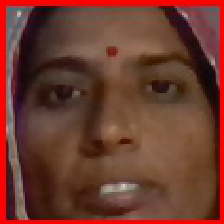

In [38]:
kim.resize((224,224))

In [39]:
nim = image.img_to_array(kim)

In [40]:
import numpy as np

In [41]:
nim = np.expand_dims(nim ,axis=0)

In [42]:
pred = newmodel.predict(nim)

In [22]:
from keras.applications.vgg16  import decode_predictions

In [32]:
decode_predictions(pred)

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 2)

In [43]:
pred

array([[4.0892490e-07, 9.9999964e-01]], dtype=float32)